In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from subprocess import check_output
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
%matplotlib inline

diabetes=pd.read_csv('diabetes.csv',encoding='gbk')

In [23]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<font size=5>数据检查</font>

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<font size=5>基本EDA分析（Exploratory Data Analysis,EDA）</font>

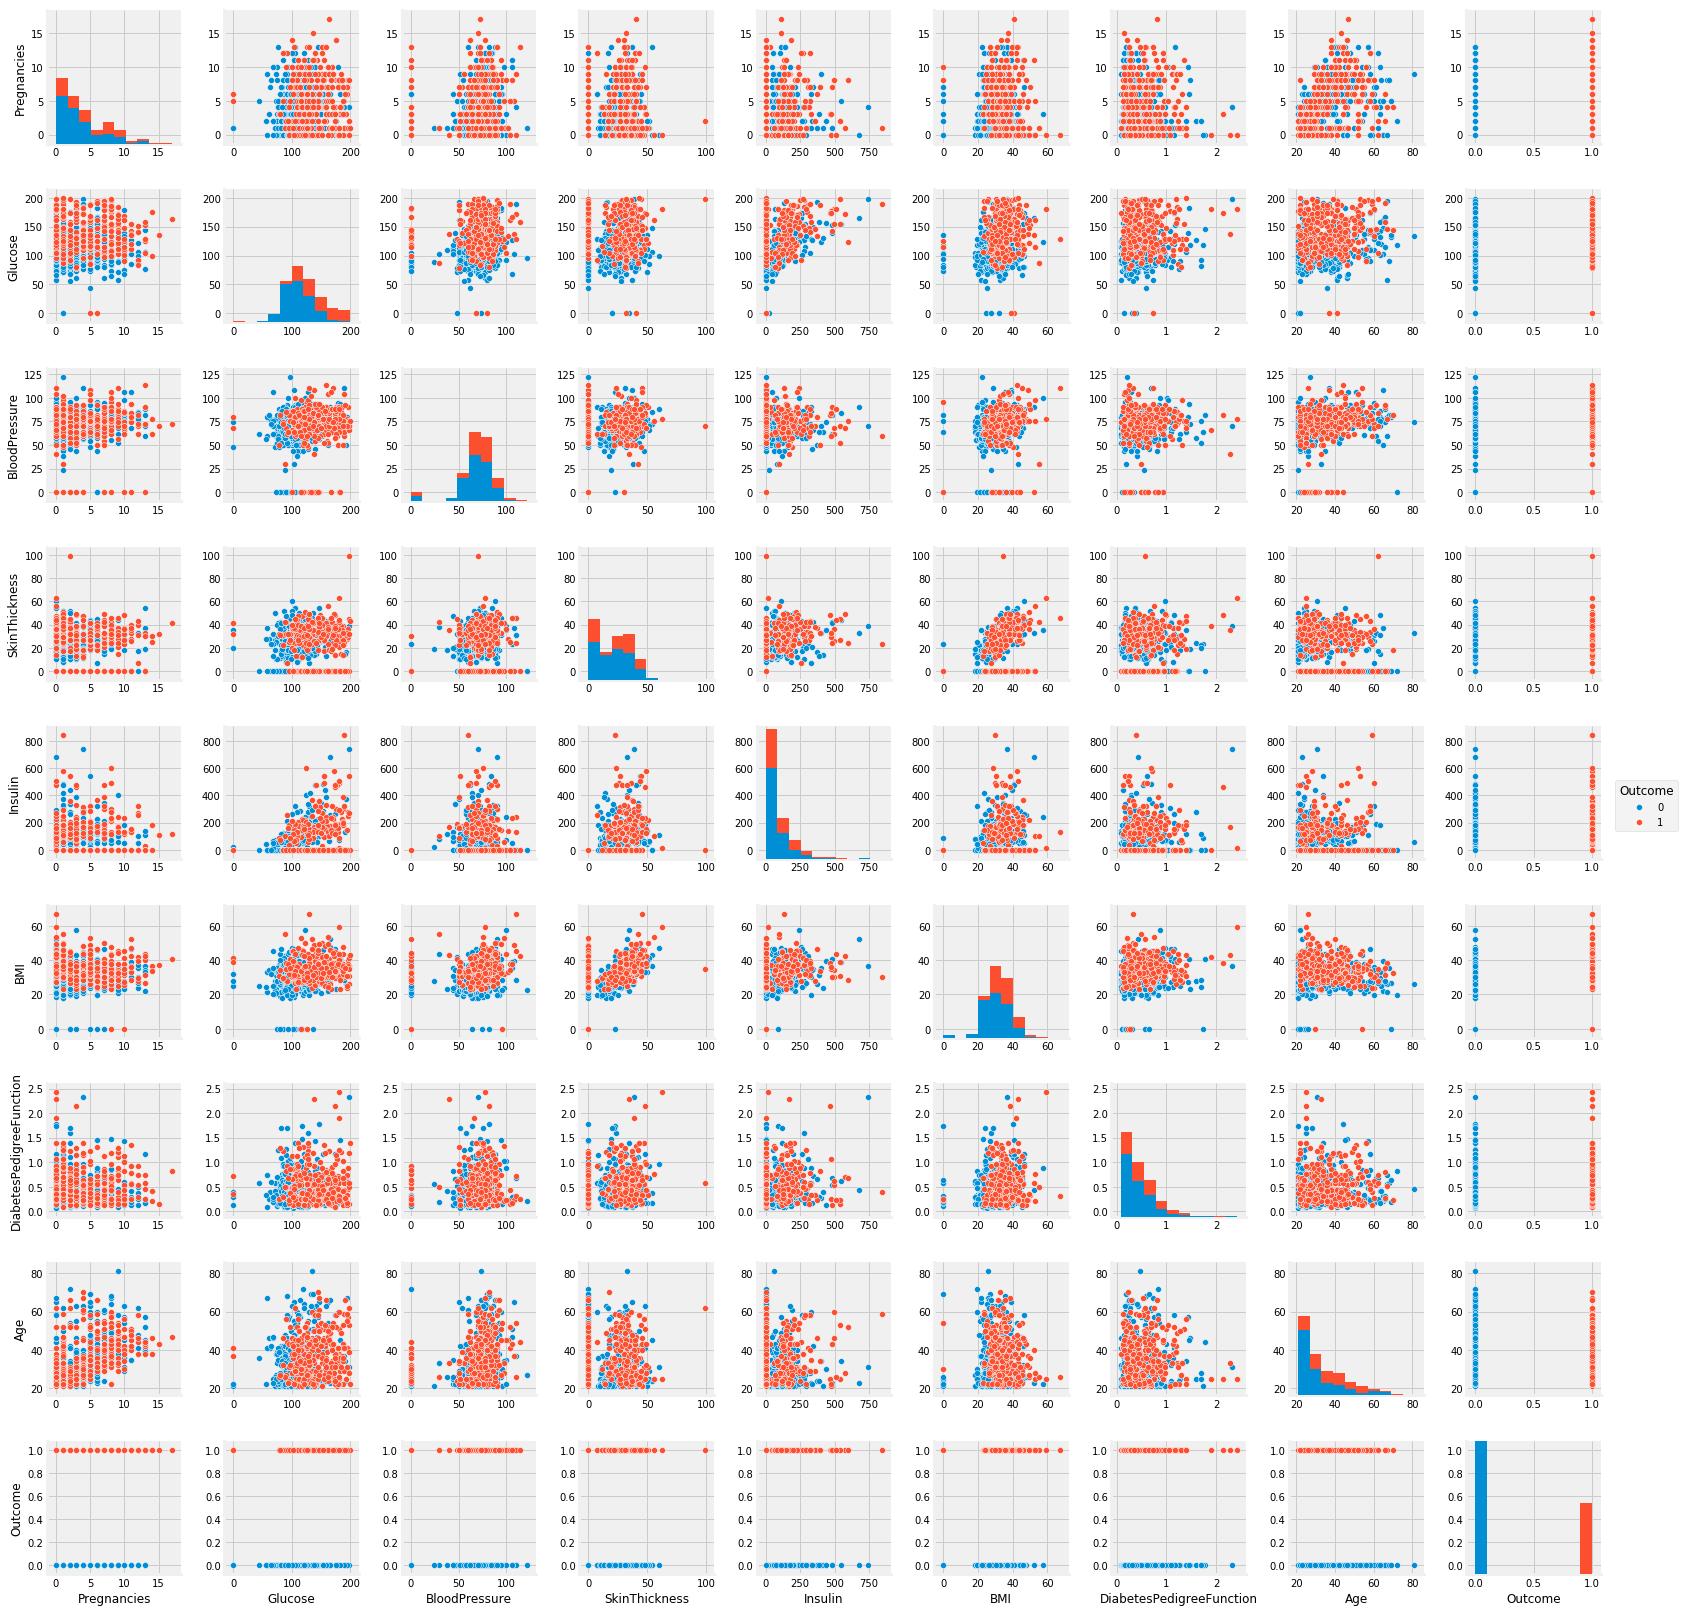

In [25]:
sns.pairplot(diabetes,hue='Outcome')

C:\Users\Taylor\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


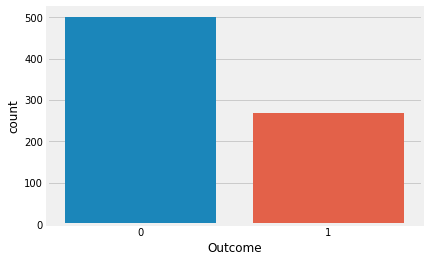

In [6]:
sns.countplot(x='Outcome',data=diabetes)
plt.show()

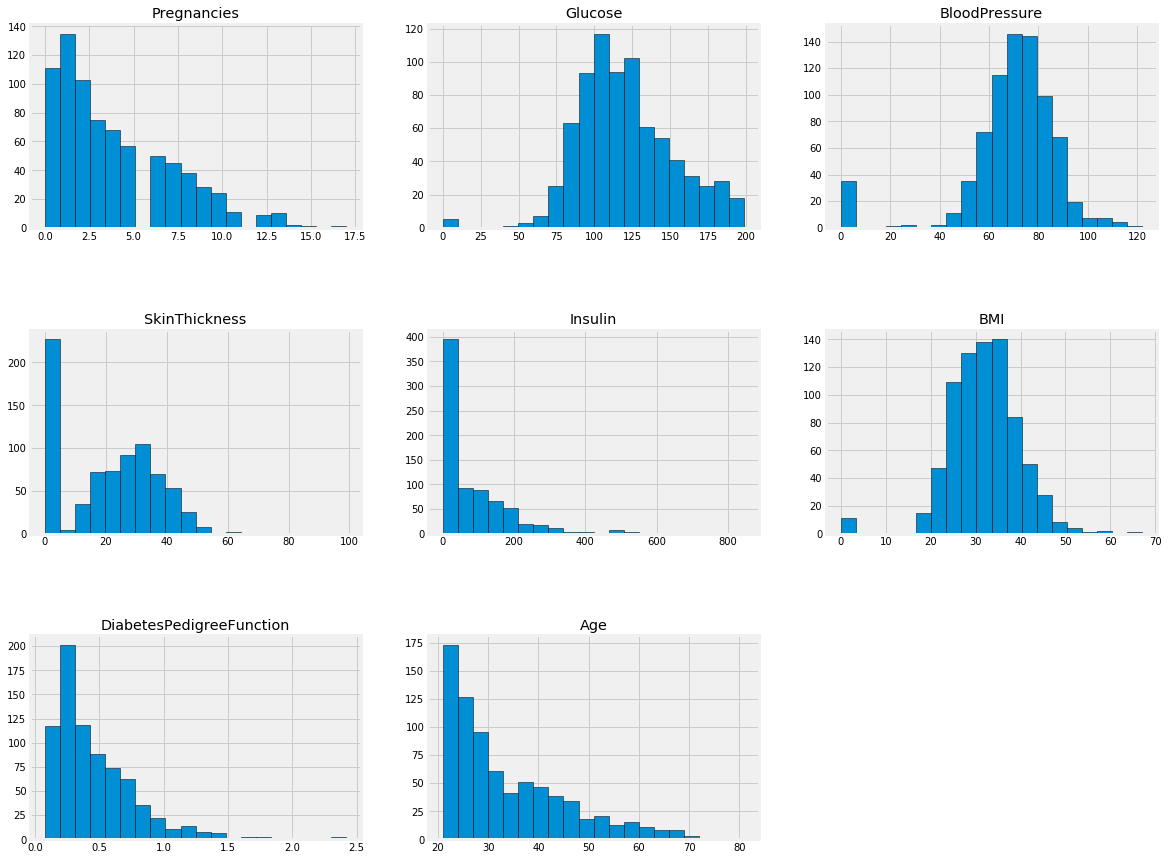

In [7]:
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

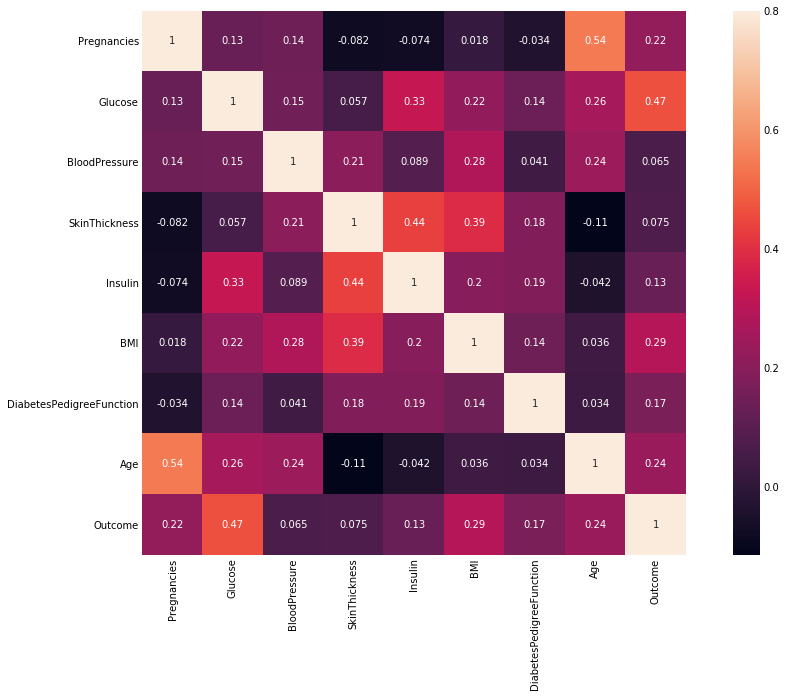

In [26]:
corrmat= diabetes.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot= True)

In [ ]:
diabetes.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

<font size=5>异常值处理</font>

In [2]:
diabetes_new=diabetes

In [3]:
max_skinthickness = diabetes_new.SkinThickness.max()
diabetes_new = diabetes_new[diabetes_new.SkinThickness!=max_skinthickness]

In [4]:
fields = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for field in fields :
    print('field %s : num 0-entries: %d' % (field, len(diabetes_new.loc[diabetes_new[field] == 0, field ])))

field Glucose : num 0-entries: 5
field BloodPressure : num 0-entries: 35
field SkinThickness : num 0-entries: 227
field Insulin : num 0-entries: 373
field BMI : num 0-entries: 11


In [5]:
def replace_zero(df, field, target):
    mean_by_target = df.loc[df[field] != 0, [field, target]].groupby(target).mean()
    diabetes_new.loc[(df[field] == 0)&(df[target] == 0), field] = mean_by_target.iloc[0][0]
    diabetes_new.loc[(df[field] == 0)&(df[target] == 1), field] = mean_by_target.iloc[1][0]

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_zero(diabetes_new, col, 'Outcome')   

C:\Users\Taylor\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<font size=5>预测模型</font>

In [6]:
diabetes_new['age_pre']=diabetes_new['Pregnancies']/diabetes_new['Age']
diabetes_new.drop('Pregnancies',axis=1,inplace=True)
diabetes_new.drop('BloodPressure',axis=1,inplace=True)

C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Taylor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel pac

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_new.drop('Outcome',axis=1), 
                                                    diabetes_new['Outcome'], test_size=0.2, 
                                                    random_state=123)

In [8]:
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(diabetes.drop('Outcome',axis=1), 
                                                    diabetes['Outcome'], test_size=0.2, 
                                                    random_state=123)

In [12]:
#Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

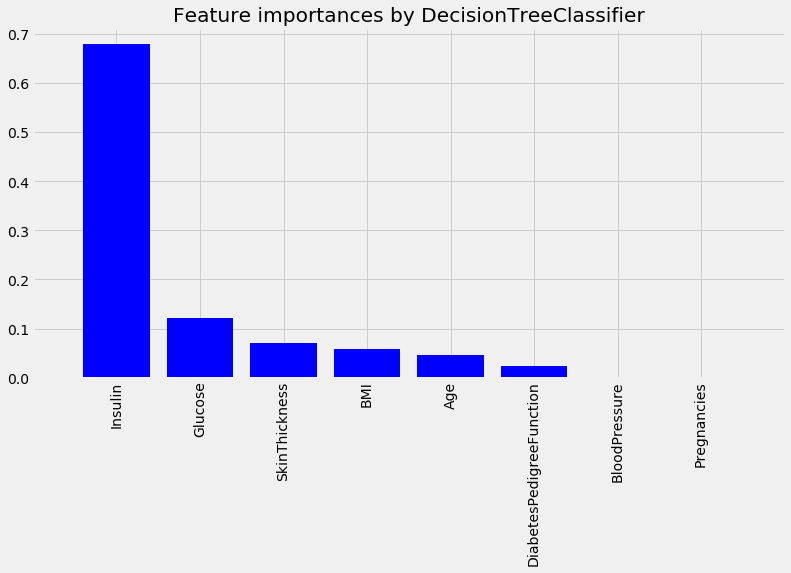

In [11]:
#Feature importance
#decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits

dtree = tree.DecisionTreeClassifier(
    max_depth=4,
    class_weight="balanced"
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = diabetes_new.drop(['Outcome'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='blue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

<font size=5>决策树模型</font>

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

dtreex = DecisionTreeClassifier(random_state=0)
dtreex.fit(X_train, y_train)
print()
print ("\n\n ---Decision Tree  Model---")
print(classification_report(y_test, dtreex.predict(X_test)))
print(confusion_matrix(y_test, dtreex.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, dtreex.predict(X_train)))
print ("Decision Tree accuracy is %3.3f" % accuracy_score(y_test, dtreex.predict(X_test) ))




 ---Decision Tree  Model---
             precision    recall  f1-score   support

          0       0.87      0.87      0.87       142
          1       0.79      0.80      0.79        89

avg / total       0.84      0.84      0.84       231

[[123  19]
 [ 18  71]]
Traininf accuracy is 1.000
Decision Tree accuracy is 0.840


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

treex = tree.DecisionTreeClassifier(max_depth=4,class_weight="balanced",criterion='gini')
treex.fit(X_train, y_train)
print ("\n\n ---Decision Tree  Model---")
print(classification_report(y_test, treex.predict(X_test)))
print(confusion_matrix(y_test, treex.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, treex.predict(X_train)))
print ("Decision Tree accuracy is %3.3f" % accuracy_score(y_test, treex.predict(X_test) ))



 ---Decision Tree  Model---
             precision    recall  f1-score   support

          0       0.97      0.76      0.85        99
          1       0.69      0.96      0.80        55

avg / total       0.87      0.83      0.83       154

[[75 24]
 [ 2 53]]
Traininf accuracy is 0.887
Decision Tree accuracy is 0.831


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

dtree1 = tree.DecisionTreeClassifier(max_depth=4,class_weight="balanced",criterion='gini')
dtree1.fit(X_train_old, y_train_old)
print ("\n\n ---Decision Tree  Model---")
print(classification_report(y_test_old, dtree1.predict(X_test_old)))
print(confusion_matrix(y_test_old, dtree1.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, dtree1.predict(X_train_old)))
print ("Decision Tree accuracy is %3.3f" % accuracy_score(y_test_old, dtree1.predict(X_test_old) ))
#max_depth=4,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01



 ---Decision Tree  Model---
             precision    recall  f1-score   support

          0       0.88      0.66      0.75       192
          1       0.60      0.84      0.70       116

avg / total       0.77      0.73      0.73       308

[[127  65]
 [ 18  98]]
Traininf accuracy is 0.780
Decision Tree accuracy is 0.731


<font size=5>随机森林模型</font>

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    class_weight="balanced",
    max_depth=4,
    random_state=100,
    n_estimators=100,
    criterion='gini'
    )

In [46]:
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, rf.predict(X_train)))
print ("Random Forest is %3.3f" % accuracy_score(y_test, rf.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.95      0.89      0.92       190
          1       0.84      0.93      0.88       117

avg / total       0.91      0.91      0.91       307

[[169  21]
 [  8 109]]
Traininf accuracy is 0.883
Random Forest is 0.906


In [47]:
rf.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, rf.predict(X_test_old)))
print(confusion_matrix(y_test_old, rf.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, rf.predict(X_train_old)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test_old, rf.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.85      0.74      0.79       192
          1       0.65      0.78      0.71       116

avg / total       0.77      0.76      0.76       308

[[142  50]
 [ 25  91]]
Traininf accuracy is 0.815
Random Forest accuracy is 0.756


<font size=5>Adaboost模型</font>

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4),n_estimators=100,random_state=100)

In [49]:
ada.fit(X_train, y_train)
print(classification_report(y_test, ada.predict(X_test)))
confusion_matrix(y_test, ada.predict(X_test))
print(confusion_matrix(y_test, ada.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, ada.predict(X_train)))
print ("ADA boost is %3.3f" % accuracy_score(y_test, ada.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       190
          1       0.89      0.91      0.90       117

avg / total       0.92      0.92      0.92       307

[[177  13]
 [ 11 106]]
Traininf accuracy is 1.000
ADA boost is 0.922


In [50]:
ada.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, ada.predict(X_test_old)))
print(confusion_matrix(y_test_old, ada.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, ada.predict(X_train_old)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test_old, ada.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.79      0.84      0.82       192
          1       0.70      0.64      0.67       116

avg / total       0.76      0.76      0.76       308

[[161  31]
 [ 42  74]]
Traininf accuracy is 1.000
Random Forest accuracy is 0.763


<font size=5>GBDT模型</font>

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(max_depth=4,n_estimators=100,learning_rate=0.1,random_state=100)

In [27]:
gbc.fit(X_train, y_train)
print(classification_report(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, gbc.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, gbc.predict(X_train)))
print ("GBC accuracy is %3.3f" % accuracy_score(y_test, gbc.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       142
          1       0.87      0.93      0.90        89

avg / total       0.92      0.92      0.92       231

[[130  12]
 [  6  83]]
Traininf accuracy is 1.000
GBC accuracy is 0.922


In [53]:
gbc.fit(X_train_old, y_train_old)
print(classification_report(y_test_old, gbc.predict(X_test_old)))
print(confusion_matrix(y_test_old, gbc.predict(X_test_old)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train_old, gbc.predict(X_train_old)))
print ("Random Forest accuracy is %3.3f" % accuracy_score(y_test_old,gbc.predict(X_test_old) ))

             precision    recall  f1-score   support

          0       0.82      0.80      0.81       192
          1       0.68      0.71      0.69       116

avg / total       0.77      0.76      0.76       308

[[153  39]
 [ 34  82]]
Traininf accuracy is 0.998
Random Forest accuracy is 0.763


<font size=5>参数寻优</font>

In [12]:
from sklearn.grid_search import GridSearchCV

C:\Users\Taylor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Taylor\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GBDT调参

20%-test

In [ ]:
param_dist = {
        'n_estimators':list(range(80,200,10)),
        'max_depth':list(range(2,12,1)),
        'learning_rate':np.linspace(0.01,0.1,1),
        'min_samples_leaf' :list(range(10,100,10)), 
        'min_samples_split':list(range(100,500,100)), 
        'max_features':list(range(2,8,1))
        
        }
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_dist, scoring='accuracy',iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [15]:
param_test1 = {'n_estimators':list(range(40,120,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10,min_samples_leaf=20,max_features='sqrt', subsample=0.8,random_state=10), param_grid = param_test1, scoring='accuracy',iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86583, std: 0.05009, params: {'n_estimators': 40},
  mean: 0.86579, std: 0.04222, params: {'n_estimators': 50},
  mean: 0.86765, std: 0.03879, params: {'n_estimators': 60},
  mean: 0.85266, std: 0.03432, params: {'n_estimators': 70},
  mean: 0.85825, std: 0.03864, params: {'n_estimators': 80},
  mean: 0.86010, std: 0.03220, params: {'n_estimators': 90},
  mean: 0.86010, std: 0.03376, params: {'n_estimators': 100},
  mean: 0.85636, std: 0.03962, params: {'n_estimators': 110}],
 {'n_estimators': 60},
 0.86764500349406)

In [16]:
param_test2= {'max_depth':list(range(3,8,1)), 'min_samples_split':list(range(100,500,100))}  
gsearch2= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=60,
                                                              min_samples_leaf=20,
                                                              max_features='sqrt',
                                                              subsample=0.8,
                                                              random_state=10),param_grid= param_test2,scoring='accuracy',iid=False,cv=5)  
gsearch2.fit(X_train,y_train)  
gsearch2.grid_scores_,gsearch2.best_params_, gsearch2.best_score_ 

([mean: 0.86387, std: 0.03809, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: 0.87690, std: 0.04742, params: {'max_depth': 3, 'min_samples_split': 200},
  mean: 0.86391, std: 0.05053, params: {'max_depth': 3, 'min_samples_split': 300},
  mean: 0.66792, std: 0.00154, params: {'max_depth': 3, 'min_samples_split': 400},
  mean: 0.86391, std: 0.03474, params: {'max_depth': 4, 'min_samples_split': 100},
  mean: 0.87876, std: 0.04431, params: {'max_depth': 4, 'min_samples_split': 200},
  mean: 0.86391, std: 0.05053, params: {'max_depth': 4, 'min_samples_split': 300},
  mean: 0.66792, std: 0.00154, params: {'max_depth': 4, 'min_samples_split': 400},
  mean: 0.86768, std: 0.03647, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.87320, std: 0.04482, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.86391, std: 0.05053, params: {'max_depth': 5, 'min_samples_split': 300},
  mean: 0.66792, std: 0.00154, params: {'max_depth': 5, 'min_samples_split': 400},
  me

In [19]:
param_test3= {'min_samples_split':list(range(100,500,100)),'min_samples_leaf':list(range(10,100,10))}  
gsearch3= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=60,
                                                              max_depth=4,
                                                              max_features='sqrt',
                                                              subsample=0.8,
                                                              random_state=10),param_grid= param_test3,scoring='accuracy',iid=False, cv=5)  
gsearch3.fit(X_train,y_train)  
gsearch3.grid_scores_,gsearch3.best_params_, gsearch3.best_score_

([mean: 0.86572, std: 0.03630, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: 0.87128, std: 0.05097, params: {'min_samples_leaf': 10, 'min_samples_split': 200},
  mean: 0.86579, std: 0.05254, params: {'min_samples_leaf': 10, 'min_samples_split': 300},
  mean: 0.66792, std: 0.00154, params: {'min_samples_leaf': 10, 'min_samples_split': 400},
  mean: 0.86391, std: 0.03474, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.87876, std: 0.04431, params: {'min_samples_leaf': 20, 'min_samples_split': 200},
  mean: 0.86391, std: 0.05053, params: {'min_samples_leaf': 20, 'min_samples_split': 300},
  mean: 0.66792, std: 0.00154, params: {'min_samples_leaf': 20, 'min_samples_split': 400},
  mean: 0.86586, std: 0.04492, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.87327, std: 0.04023, params: {'min_samples_leaf': 30, 'min_samples_split': 200},
  mean: 0.86950, std: 0.05108, params: {'min_samples_leaf': 30, 'min_samples_split': 300},

In [20]:
param_test= {'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}  
gsearch= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=60,
                                                              max_depth=6,
                                                              min_samples_leaf =20,
                                                              min_samples_split =200,
                                                              random_state=10),param_grid= param_test,scoring='accuracy', iid=False, cv=5)  
gsearch.fit(X_train,y_train)  
gsearch.grid_scores_,gsearch.best_params_, gsearch.best_score_

([mean: 0.86212, std: 0.05179, params: {'subsample': 0.5},
  mean: 0.87135, std: 0.05459, params: {'subsample': 0.55},
  mean: 0.86761, std: 0.05978, params: {'subsample': 0.6},
  mean: 0.85454, std: 0.05642, params: {'subsample': 0.65},
  mean: 0.86758, std: 0.05033, params: {'subsample': 0.7},
  mean: 0.86572, std: 0.04660, params: {'subsample': 0.75},
  mean: 0.86576, std: 0.04494, params: {'subsample': 0.8},
  mean: 0.86387, std: 0.04908, params: {'subsample': 0.85},
  mean: 0.86946, std: 0.04517, params: {'subsample': 0.9}],
 {'subsample': 0.55},
 0.8713487071977639)

In [21]:
param_test4= {'max_features':list(range(1,8,1))}  
gsearch4= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              n_estimators=60,
                                                              max_depth=4, 
                                                              min_samples_leaf =20,
                                                              min_samples_split =200,
                                                              subsample=0.55,
                                                              random_state=10),param_grid= param_test4,scoring='roc_auc',iid=False,cv=5)  
gsearch4.fit(X_train,y_train)  
gsearch4.grid_scores_,gsearch4.best_params_, gsearch4.best_score_ 

([mean: 0.90018, std: 0.05156, params: {'max_features': 1},
  mean: 0.91190, std: 0.04775, params: {'max_features': 2},
  mean: 0.91398, std: 0.04734, params: {'max_features': 3},
  mean: 0.92008, std: 0.03934, params: {'max_features': 4},
  mean: 0.91793, std: 0.04025, params: {'max_features': 5},
  mean: 0.92129, std: 0.04017, params: {'max_features': 6},
  mean: 0.91701, std: 0.04100, params: {'max_features': 7}],
 {'max_features': 6},
 0.9212894030851778)

In [14]:
gbm1= GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=60,
                                 max_depth=4,
                                 min_samples_split =100,
                                 max_features=6
                                 )
gbm1.fit(X_train,y_train)  
print(classification_report(y_test, gbm1.predict(X_test)))
print(confusion_matrix(y_test, gbm1.predict(X_test)))
print("Traininf accuracy is %3.3f"% accuracy_score(y_train, gbm1.predict(X_train)))
print ("GBC accuracy is %3.3f" % accuracy_score(y_test, gbm1.predict(X_test) ))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92        99
          1       0.81      0.95      0.87        55

avg / total       0.91      0.90      0.90       154

[[87 12]
 [ 3 52]]
Traininf accuracy is 0.954
GBC accuracy is 0.903


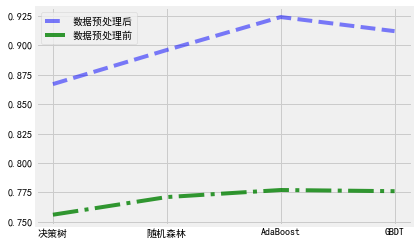

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
group_label = ['决策树','随机森林','AdaBoost','GBDT']
y1=[0.867,0.896,0.924,0.912]
y2=[0.756,0.771,0.777,0.776]
x=[1,2,3,4]
plt.plot(x,y1,ls='--',lw=4,c='b',alpha=0.5,label=u'数据预处理后')
plt.plot(x,y2,ls='-.',lw=4,c='g',alpha=0.8,label=u'数据预处理前')
plt.xticks(x, group_label, rotation=0)  
plt.legend()
plt.show()